In [ ]:
#TASK 1 - Install matplotlib and deap
#       - Import all necessary libraries
!pip install matplotlib deap

import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
# TODO: Task 2 - Define the number of locations and vehicles

num_locations = 20  # Define how many locations (excluding the depot) the vehicles need to visit
                # Define the number of locations (eg 10)

locations =  [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]  # Generate random (x, y) coordinates for each location
            # Create a list of tuples representing location coordinates -
            # try to use a random number generator
            # (x, y) could be between 0 and 100

depot = (50, 50)  # Define the central depot location as a fixed point
        # Define the coordinates for the depot

num_vehicles = 3  # Define how many vehicles are available to visit the locations
                # Define the number of vehicles - (eg 3)

In [ ]:
# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Define fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin)  # Define individual structure. Individuals are lists with a fitness attribute.

In [ ]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  # Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Function to create a population of individuals

In [ ]:
# TASK 5 and 6

def evalVRP(individual):
    # TODO: Task 5 - Write the fitness evaluation function
    #              - Return (total distance, standard deviation)
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = 0
        for j in range(len(vehicle_route) - 1):
            vehicle_distance += np.linalg.norm(np.array(vehicle_route[j]) - np.array(vehicle_route[j + 1]))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(total_distance)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty



#TASK 6 - Register the evaluate function in the toolbox
toolbox.register("evaluate", evalVRP)

In [ ]:
import math
import numpy as np

def calculate_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def split_routes(individual, num_vehicles):
    """
    Split the individual's route into sub-routes for each vehicle.
    - Assumes the routes are evenly divided for simplicity.
    """
    avg_route_length = len(individual) // num_vehicles
    return [individual[i:i + avg_route_length] for i in range(0, len(individual), avg_route_length)]

def evalVRP(individual):
    """
    Fitness function for the VRP:
    - Returns (total distance, standard deviation of route distances).
    """
    total_distances = []
    routes = split_routes(individual, num_vehicles)

    for route in routes:
        route_distance = 0
        # Start at the depot
        current_location = depot
        for loc_index in route:
            next_location = locations[loc_index]
            route_distance += calculate_distance(current_location, next_location)
            current_location = next_location
        # Return to the depot
        route_distance += calculate_distance(current_location, depot)
        total_distances.append(route_distance)

    # Calculate total distance and standard deviation
    total_distance = sum(total_distances)
    std_dev = np.std(total_distances)

    return total_distance, std_dev  # DEAP expects fitness to be a tuple


In [ ]:
# TODO: Task 7 - Configure the genetic operators

toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [ ]:
# SOLUTION - TASK 8
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

In [ ]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof


gen	nevals	avg    	min
0  	300   	507.527	0  
1  	213   	485.034	0  
2  	243   	478.427	0  
3  	232   	475.63 	0  
4  	233   	469.277	0  
5  	218   	464.326	0  
6  	213   	459.005	0  
7  	233   	457.909	0  
8  	219   	451.112	0  
9  	209   	437.911	0  
10 	224   	434.313	0  
11 	230   	442.551	0  
12 	230   	441.756	0  
13 	217   	438.328	0  
14 	231   	442.372	0  
15 	250   	446.031	0  
16 	238   	444.69 	0  
17 	236   	435.125	0  
18 	225   	428.865	0  
19 	225   	423.499	0  
20 	209   	412.361	0  
21 	232   	401.061	0  
22 	237   	389.303	0  
23 	217   	379.56 	0  
24 	227   	354.924	0  
25 	246   	342.303	0  
26 	233   	324.893	0  
27 	219   	318.749	0  
28 	229   	314.554	0  
29 	223   	309.381	0  
30 	238   	305.265	0  
31 	225   	296.322	0  
32 	221   	294.069	0  
33 	243   	286.36 	0  
34 	232   	282.43 	0  
35 	244   	278.428	0  
36 	233   	282.01 	0  
37 	217   	278.436	0  
38 	239   	280.293	0  
39 	229   	278.497	0  
40 	214   	281.1  	0  
41 	241   	279.971	0  
42 	249   	

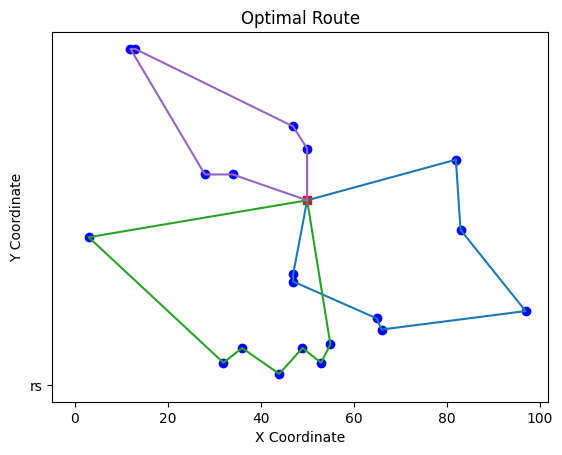

Best Individual: [14, 9, 7, 16, 12, 10, 8, 15, 18, 4, 11, 3, 6, 5, 2, 19, 0, 13, 1, 17]
Fitness: (447.02081506621903, 0.0)


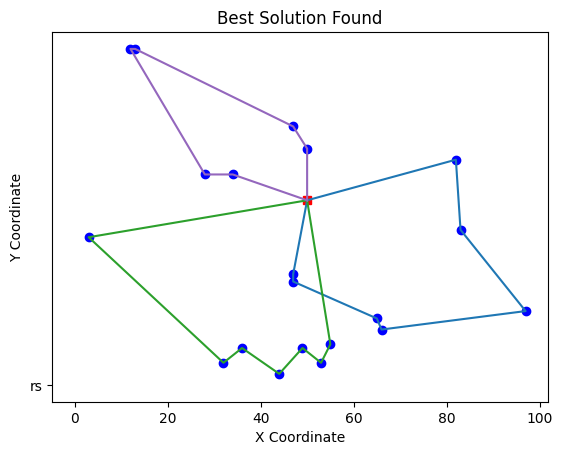

In [ ]:
# prompt: if __name__ == "__main__":
#     # TODO: Task 9 - Call the main function, run the algorithm and print the results

if __name__ == "__main__":
    pop, stats, hof = main()
    best_individual = hof[0]
    print("Best Individual:", best_individual)
    print("Fitness:", best_individual.fitness.values)
    plot_routes(best_individual, "Best Solution Found")